In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("esg_sample.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

# Preview first few rows
df.head(10)

Shape: (100, 12)

Column types:
 Company                   object
Ticker                    object
Sector                    object
Country                   object
E_score                  float64
S_score                  float64
G_score                  float64
Controversies              int64
Revenue_million_usd      float64
NetIncome_million_usd    float64
MarketCap_million_usd    float64
StockReturn_1Y_pct       float64
dtype: object

Missing values:
 Company                  0
Ticker                   0
Sector                   0
Country                  0
E_score                  3
S_score                  3
G_score                  3
Controversies            0
Revenue_million_usd      0
NetIncome_million_usd    0
MarketCap_million_usd    0
StockReturn_1Y_pct       0
dtype: int64


,Company,Ticker,Sector,Country,E_score,S_score,G_score,Controversies,Revenue_million_usd,NetIncome_million_usd,MarketCap_million_usd,StockReturn_1Y_pct
0,Utilities Corp 1,UC11,Utilities,Sweden,55.5,54.3,63.1,0,497.1,74.9,2683.5,22.4
1,Energy Corp 2,EC22,Energy,India,59.5,56.1,64.8,1,1199.2,152.0,11882.5,-1.4
2,Telecom Corp 3,TC33,Telecom,Sweden,55.2,58.3,69.7,1,399.2,15.3,3396.3,9.9
3,Real Estate Corp 4,REC4,Real,Netherlands,47.2,59.1,63.0,0,693.5,128.6,3105.3,37.2
4,Consumer Discretionary Corp 5,CDC5,Consumer,UK,71.0,55.7,67.9,0,1073.9,174.2,14782.3,18.3
5,Utilities Corp 6,UC66,Utilities,USA,76.2,41.0,73.5,0,796.4,19.2,12352.5,25.8
6,Consumer Staples Corp 7,CSC7,Consumer,USA,48.2,47.1,36.1,0,568.6,78.0,9904.0,19.3
7,Healthcare Corp 8,HC88,Healthcare,India,NaN,59.0,59.2,0,3428.0,544.5,17438.9,21.7
8,Utilities Corp 9,UC99,Utilities,India,57.4,48.4,70.8,0,1790.7,156.5,32052.7,7.6
9,Telecom Corp 10,TC110,Telecom,India,68.5,NaN,44.0,0,364.0,11.8,5070.4,6.6


In [2]:
# -----------------------------
# Step 2: Data Cleaning + Scoring
# -----------------------------

# 1️⃣ Fill missing E, S, G scores with column averages
df['E_score'].fillna(df['E_score'].mean(), inplace=True)
df['S_score'].fillna(df['S_score'].mean(), inplace=True)
df['G_score'].fillna(df['G_score'].mean(), inplace=True)

# 2️⃣ Normalize controversy: higher controversies = penalty
#    We'll subtract 5 points per controversy incident (you can adjust)
df['Controversy_Penalty'] = df['Controversies'] * 5

# 3️⃣ Compute a simple equal-weight Total ESG score
df['Total_ESG'] = (df['E_score'] + df['S_score'] + df['G_score']) / 3

# 4️⃣ Create a Custom Weighted ESG score (Environmental 40%, Social 30%, Governance 30%)
df['Custom_ESG'] = (
    df['E_score'] * 0.4 +
    df['S_score'] * 0.3 +
    df['G_score'] * 0.3
) - df['Controversy_Penalty']

# 5️⃣ Sort top companies by Custom ESG
top10 = df.sort_values('Custom_ESG', ascending=False).head(10)

print("✅ Missing values filled and ESG scores created!")
print("\nTop 10 companies by Custom ESG score:\n")
display(top10[['Company','Sector','Country','E_score','S_score','G_score','Controversies','Custom_ESG']])

✅ Missing values filled and ESG scores created!

Top 10 companies by Custom ESG score:



/tmp/ipython-input-2205250038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['E_score'].fillna(df['E_score'].mean(), inplace=True)
/tmp/ipython-input-2205250038.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Company,Sector,Country,E_score,S_score,G_score,Controversies,Custom_ESG
39,Utilities Corp 40,Utilities,USA,69.3,91.4,63.8,0,74.28
17,Industrials Corp 18,Industrials,USA,67.1,80.7,76.9,0,74.12
85,Utilities Corp 86,Utilities,USA,80.2,62.1,74.1,0,72.94
34,Energy Corp 35,Energy,Sweden,80.6,57.8,75.2,0,72.14
10,Telecom Corp 11,Telecom,USA,84.3,58.0,65.9,0,70.89
66,Industrials Corp 67,Industrials,USA,61.0,78.1,76.3,0,70.72
96,Healthcare Corp 97,Healthcare,USA,81.3,71.7,54.8,0,70.47
40,Consumer Discretionary Corp 41,Consumer,UK,71.7,73.4,65.1,0,70.23
59,Real Estate Corp 60,Real,France,85.7,54.6,64.2,0,69.92
92,Healthcare Corp 93,Healthcare,USA,77.3,58.1,71.1,0,69.68


In [3]:
import sqlite3
import pandas as pd

In [4]:
# Create (or connect to) a local SQLite database in memory
conn = sqlite3.connect("esg_database.db")

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [5]:
# Save the pandas DataFrame to SQLite as a table called 'esg_scores'
df.to_sql("esg_scores", conn, if_exists="replace", index=False)

print("✅ Dataset loaded into SQLite database successfully!")

✅ Dataset loaded into SQLite database successfully!


In [6]:
# Example: Select top 5 companies by Custom_ESG
query = """
SELECT Company, Sector, Country, Custom_ESG
FROM esg_scores
ORDER BY Custom_ESG DESC
LIMIT 5;
"""
top5 = pd.read_sql(query, conn)
top5

,Company,Sector,Country,Custom_ESG
0,Utilities Corp 40,Utilities,USA,74.28
1,Industrials Corp 18,Industrials,USA,74.12
2,Utilities Corp 86,Utilities,USA,72.94
3,Energy Corp 35,Energy,Sweden,72.14
4,Telecom Corp 11,Telecom,USA,70.89


In [7]:
import sqlite3
import pandas as pd

# 1️⃣ Connect to SQLite database (creates 'esg_database.db')
conn = sqlite3.connect("esg_database.db")
cursor = conn.cursor()

# 2️⃣ Load the DataFrame into a SQL table called 'esg_scores'
df.to_sql("esg_scores", conn, if_exists="replace", index=False)
print("✅ Dataset loaded into SQLite database successfully!")

# 3️⃣ Example queries

# Top 5 companies by Custom ESG
query_top5 = """
SELECT Company, Sector, Country, Custom_ESG
FROM esg_scores
ORDER BY Custom_ESG DESC
LIMIT 5;
"""
top5_sql = pd.read_sql(query_top5, conn)
display(top5_sql)

# Average ESG score by Sector
query_avg_sector = """
SELECT Sector, AVG(Custom_ESG) AS Avg_Custom_ESG
FROM esg_scores
GROUP BY Sector
ORDER BY Avg_Custom_ESG DESC;
"""
avg_sector = pd.read_sql(query_avg_sector, conn)
display(avg_sector)

# Average ESG score by Country
query_avg_country = """
SELECT Country, AVG(Custom_ESG) AS Avg_Custom_ESG
FROM esg_scores
GROUP BY Country
ORDER BY Avg_Custom_ESG DESC;
"""
avg_country = pd.read_sql(query_avg_country, conn)
display(avg_country)

✅ Dataset loaded into SQLite database successfully!


,Company,Sector,Country,Custom_ESG
0,Utilities Corp 40,Utilities,USA,74.28
1,Industrials Corp 18,Industrials,USA,74.12
2,Utilities Corp 86,Utilities,USA,72.94
3,Energy Corp 35,Energy,Sweden,72.14
4,Telecom Corp 11,Telecom,USA,70.89


,Sector,Avg_Custom_ESG
0,Utilities,64.184444
1,Industrials,62.091667
2,Healthcare,61.465785
3,Technology,61.004035
4,Consumer,57.465464
5,Telecom,57.216097
6,Materials,57.079000
7,Real,55.505714
8,Energy,55.103631
9,Financials,52.788474


,Country,Avg_Custom_ESG
0,UK,63.461214
1,Canada,61.265954
2,India,60.012558
3,France,59.513454
4,Sweden,59.445000
5,USA,56.978756
6,Netherlands,56.340000
7,Japan,55.015000
8,Germany,54.440000
9,China,50.484562


In [8]:
# -----------------------------
# Step 4: Professional SQL Queries
# -----------------------------

# 1️⃣ Top 5 companies by Custom ESG score
query1 = """
SELECT Company, Sector, Country, Custom_ESG
FROM esg_scores
ORDER BY Custom_ESG DESC
LIMIT 5;
"""
top5 = pd.read_sql(query1, conn)
print("Top 5 Companies by Custom ESG")
display(top5)

# 2️⃣ Average Custom ESG by Sector
query2 = """
SELECT Sector, AVG(Custom_ESG) AS Avg_Custom_ESG
FROM esg_scores
GROUP BY Sector
ORDER BY Avg_Custom_ESG DESC;
"""
avg_sector = pd.read_sql(query2, conn)
print("Average ESG Score by Sector")
display(avg_sector)

# 3️⃣ Average Custom ESG by Country
query3 = """
SELECT Country, AVG(Custom_ESG) AS Avg_Custom_ESG
FROM esg_scores
GROUP BY Country
ORDER BY Avg_Custom_ESG DESC;
"""
avg_country = pd.read_sql(query3, conn)
print("Average ESG Score by Country")
display(avg_country)

# 4️⃣ Companies with Custom ESG > 70 AND Zero Controversies
query4 = """
SELECT Company, Sector, Country, Custom_ESG, Controversies
FROM esg_scores
WHERE Custom_ESG > 70 AND Controversies = 0
ORDER BY Custom_ESG DESC;
"""
high_esg_no_controversy = pd.read_sql(query4, conn)
print("High ESG Companies with No Controversies")
display(high_esg_no_controversy)

# 5️⃣ Top 3 companies by Stock Return per Sector
query5 = """
SELECT Sector, Company, StockReturn_1Y_pct
FROM esg_scores
WHERE StockReturn_1Y_pct IS NOT NULL
AND Sector IN (SELECT DISTINCT Sector FROM esg_scores)
ORDER BY Sector, StockReturn_1Y_pct DESC;
"""
stock_return_top = pd.read_sql(query5, conn)
print("Top Companies by Stock Return per Sector")
display(stock_return_top)

# 6️⃣ Correlation between Custom ESG and Stock Return
query6 = """
SELECT Custom_ESG, StockReturn_1Y_pct
FROM esg_scores
WHERE StockReturn_1Y_pct IS NOT NULL;
"""
corr_df = pd.read_sql(query6, conn)
correlation = corr_df['Custom_ESG'].corr(corr_df['StockReturn_1Y_pct'])
print(f"Correlation between Custom ESG and 1-Year Stock Return: {correlation:.2f}")

# 7️⃣ Top ESG company per Country
query7 = """
SELECT Country, Company, MAX(Custom_ESG) AS Max_ESG
FROM esg_scores
GROUP BY Country
ORDER BY Max_ESG DESC;
"""
top_country_esg = pd.read_sql(query7, conn)
print("Top ESG Company per Country")
display(top_country_esg)

Top 5 Companies by Custom ESG


,Company,Sector,Country,Custom_ESG
0,Utilities Corp 40,Utilities,USA,74.28
1,Industrials Corp 18,Industrials,USA,74.12
2,Utilities Corp 86,Utilities,USA,72.94
3,Energy Corp 35,Energy,Sweden,72.14
4,Telecom Corp 11,Telecom,USA,70.89


Average ESG Score by Sector


,Sector,Avg_Custom_ESG
0,Utilities,64.184444
1,Industrials,62.091667
2,Healthcare,61.465785
3,Technology,61.004035
4,Consumer,57.465464
5,Telecom,57.216097
6,Materials,57.079000
7,Real,55.505714
8,Energy,55.103631
9,Financials,52.788474


Average ESG Score by Country


,Country,Avg_Custom_ESG
0,UK,63.461214
1,Canada,61.265954
2,India,60.012558
3,France,59.513454
4,Sweden,59.445000
5,USA,56.978756
6,Netherlands,56.340000
7,Japan,55.015000
8,Germany,54.440000
9,China,50.484562


High ESG Companies with No Controversies


,Company,Sector,Country,Custom_ESG,Controversies
0,Utilities Corp 40,Utilities,USA,74.28,0
1,Industrials Corp 18,Industrials,USA,74.12,0
2,Utilities Corp 86,Utilities,USA,72.94,0
3,Energy Corp 35,Energy,Sweden,72.14,0
4,Telecom Corp 11,Telecom,USA,70.89,0
5,Industrials Corp 67,Industrials,USA,70.72,0
6,Healthcare Corp 97,Healthcare,USA,70.47,0
7,Consumer Discretionary Corp 41,Consumer,UK,70.23,0


Top Companies by Stock Return per Sector


,Sector,Company,StockReturn_1Y_pct
0,Consumer,Consumer Discretionary Corp 51,46.4
1,Consumer,Consumer Discretionary Corp 41,37.5
2,Consumer,Consumer Staples Corp 32,29.1
3,Consumer,Consumer Staples Corp 71,19.8
4,Consumer,Consumer Staples Corp 7,19.3
...,...,...,...
95,Utilities,Utilities Corp 86,9.8
96,Utilities,Utilities Corp 43,9.1
97,Utilities,Utilities Corp 9,7.6
98,Utilities,Utilities Corp 74,-2.8


Correlation between Custom ESG and 1-Year Stock Return: 0.16
Top ESG Company per Country


,Country,Company,Max_ESG
0,USA,Utilities Corp 40,74.28
1,Sweden,Energy Corp 35,72.14
2,UK,Consumer Discretionary Corp 41,70.23
3,France,Real Estate Corp 60,69.92
4,India,Consumer Staples Corp 48,67.61
5,Germany,Utilities Corp 54,66.39
6,Canada,Materials Corp 83,63.92
7,Japan,Materials Corp 85,63.06
8,Netherlands,Real Estate Corp 15,59.24
9,China,Real Estate Corp 16,55.92


/tmp/ipython-input-3278205935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Custom_ESG', y='Sector', data=avg_sector, palette="viridis")


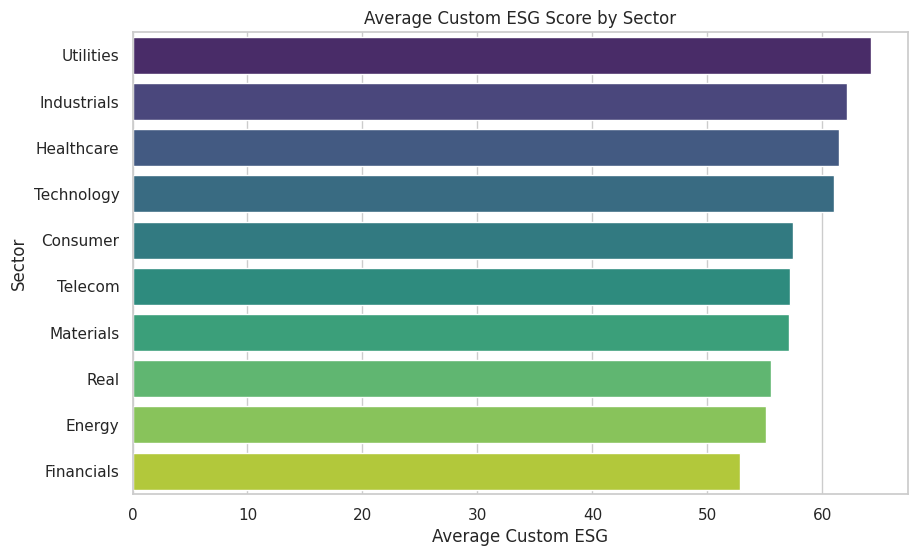

/tmp/ipython-input-3278205935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Custom_ESG', y='Country', data=avg_country, palette="plasma")


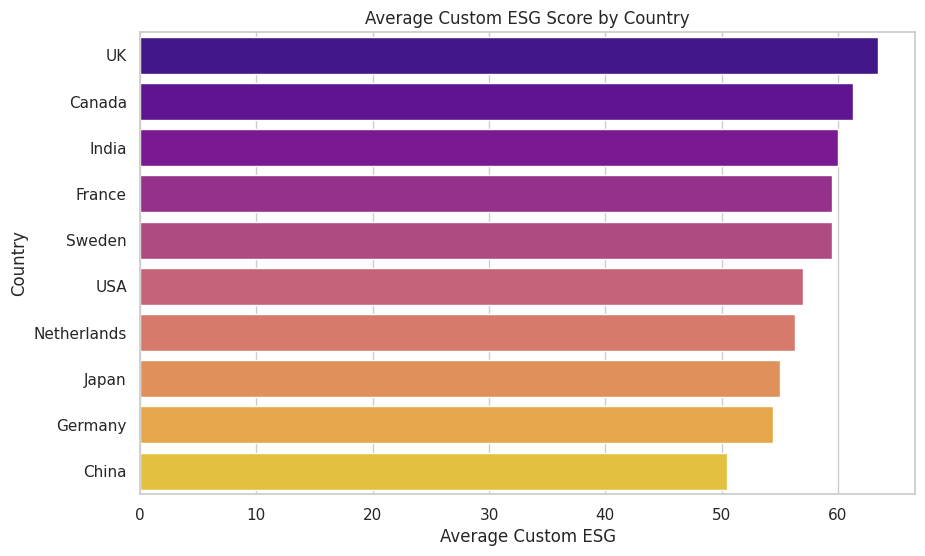

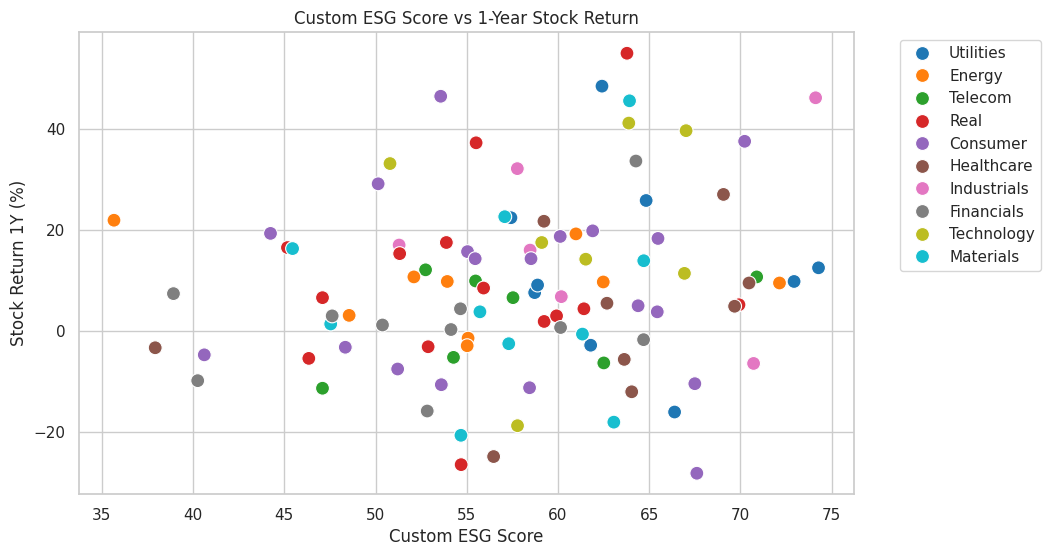

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Bar chart: Average ESG by Sector
plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Custom_ESG', y='Sector', data=avg_sector, palette="viridis")
plt.title('Average Custom ESG Score by Sector')
plt.xlabel('Average Custom ESG')
plt.ylabel('Sector')
plt.show()

# 2️⃣ Bar chart: Average ESG by Country
plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Custom_ESG', y='Country', data=avg_country, palette="plasma")
plt.title('Average Custom ESG Score by Country')
plt.xlabel('Average Custom ESG')
plt.ylabel('Country')
plt.show()

# 3️⃣ Scatter plot: Custom ESG vs 1-Year Stock Return
plt.figure(figsize=(10,6))
sns.scatterplot(x='Custom_ESG', y='StockReturn_1Y_pct', data=df, hue='Sector', palette='tab10', s=100)
plt.title('Custom ESG Score vs 1-Year Stock Return')
plt.xlabel('Custom ESG Score')
plt.ylabel('Stock Return 1Y (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 🌱 ESG Analytics Dashboard

### 🏆 Top 10 Companies by Custom ESG Score

,Company,Sector,Country,Custom_ESG
39,Utilities Corp 40,Utilities,USA,74.28
17,Industrials Corp 18,Industrials,USA,74.12
85,Utilities Corp 86,Utilities,USA,72.94
34,Energy Corp 35,Energy,Sweden,72.14
10,Telecom Corp 11,Telecom,USA,70.89
66,Industrials Corp 67,Industrials,USA,70.72
96,Healthcare Corp 97,Healthcare,USA,70.47
40,Consumer Discretionary Corp 41,Consumer,UK,70.23
59,Real Estate Corp 60,Real,France,69.92
92,Healthcare Corp 93,Healthcare,USA,69.68


### 📊 Average Custom ESG Score by Sector

/tmp/ipython-input-2756351958.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Custom_ESG', y='Sector', data=avg_sector, palette="viridis")


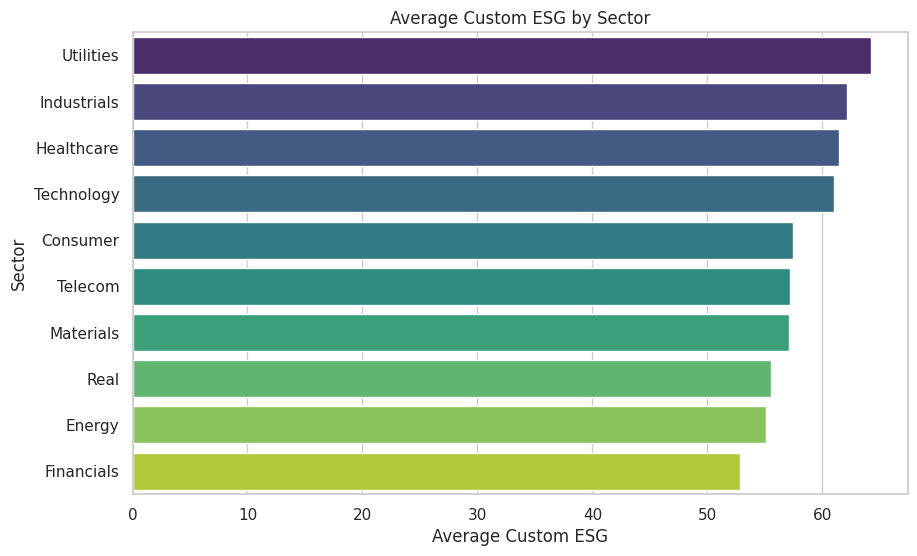

### 🌍 Average Custom ESG Score by Country

/tmp/ipython-input-2756351958.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Custom_ESG', y='Country', data=avg_country, palette="plasma")


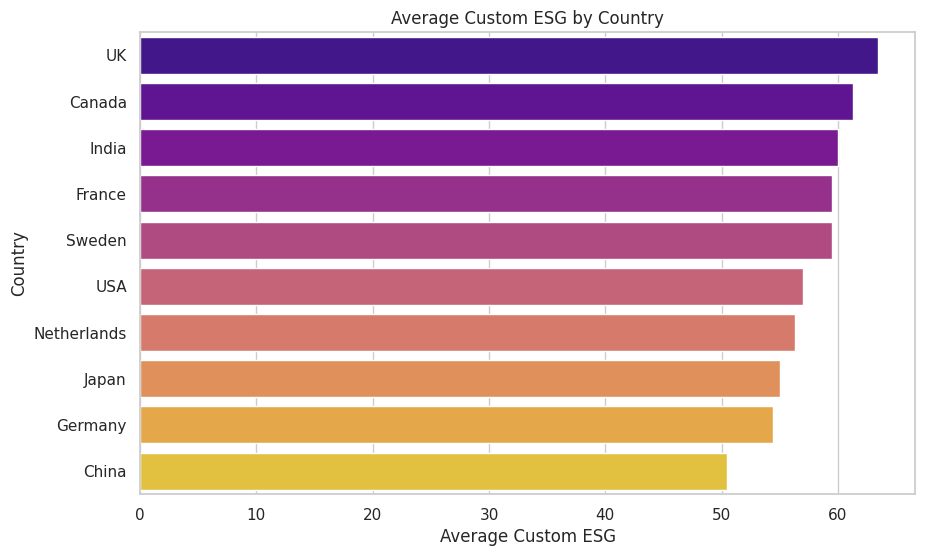

### 📈 Custom ESG vs 1-Year Stock Return

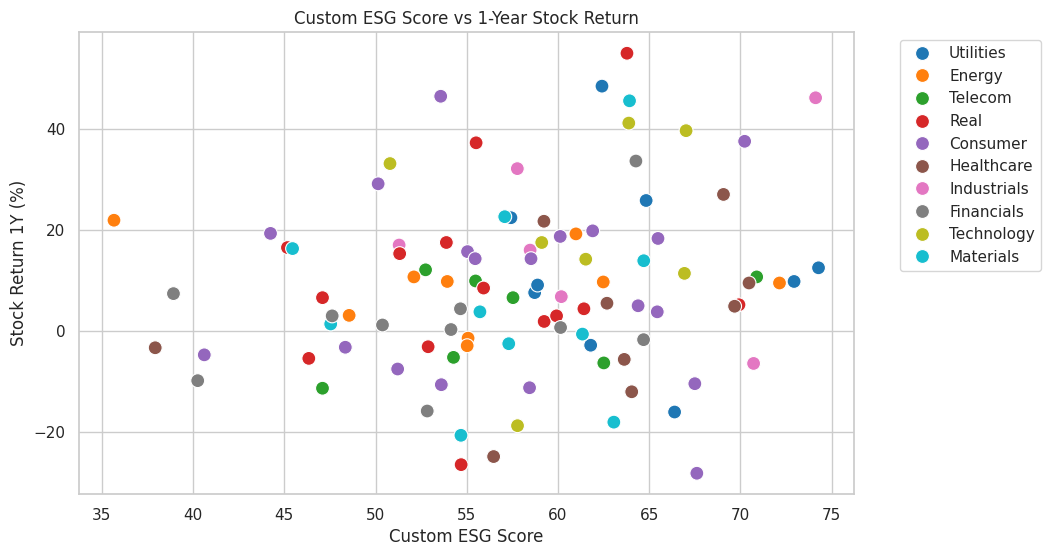

### 🔗 Correlation between Custom ESG and 1-Year Stock Return: **0.16**

In [10]:
from IPython.display import display, Markdown

# -----------------------------
# ESG Dashboard
# -----------------------------

# 1️⃣ Title
display(Markdown("## 🌱 ESG Analytics Dashboard"))

# 2️⃣ Top 10 Companies by Custom ESG
display(Markdown("### 🏆 Top 10 Companies by Custom ESG Score"))
top10_dashboard = df.sort_values('Custom_ESG', ascending=False).head(10)
display(top10_dashboard[['Company', 'Sector', 'Country', 'Custom_ESG']])

# 3️⃣ Average ESG by Sector
display(Markdown("### 📊 Average Custom ESG Score by Sector"))
plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Custom_ESG', y='Sector', data=avg_sector, palette="viridis")
plt.xlabel('Average Custom ESG')
plt.ylabel('Sector')
plt.title('Average Custom ESG by Sector')
plt.show()

# 4️⃣ Average ESG by Country
display(Markdown("### 🌍 Average Custom ESG Score by Country"))
plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Custom_ESG', y='Country', data=avg_country, palette="plasma")
plt.xlabel('Average Custom ESG')
plt.ylabel('Country')
plt.title('Average Custom ESG by Country')
plt.show()

# 5️⃣ Scatter plot: ESG vs Stock Return
display(Markdown("### 📈 Custom ESG vs 1-Year Stock Return"))
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Custom_ESG', y='StockReturn_1Y_pct',
    data=df, hue='Sector', palette='tab10', s=100
)
plt.title('Custom ESG Score vs 1-Year Stock Return')
plt.xlabel('Custom ESG Score')
plt.ylabel('Stock Return 1Y (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 6️⃣ ESG vs Stock Return Correlation
correlation = df['Custom_ESG'].corr(df['StockReturn_1Y_pct'])
display(Markdown(f"### 🔗 Correlation between Custom ESG and 1-Year Stock Return: **{correlation:.2f}**"))